## Assignment 2 - Convolutional Neural Networks

In this assignment, you will learn how to implement CNN which you've learnt in the module 2. As a part of this assignment, you will perform image classification using CNNs in PyTorch. The dataset which you'll be using in this assignment will be the standard CIFAR-10 dataset. One important thing you need to know about CIFAR-10 dataset is that the image dimensions in this dataset is 32 $\times$ 32, which is not as same as the MNIST dataset dimension which you might've used while learning FNNs. This notebook contains some pre-written code blocks and some empty cells which you need to fill to build a CNN and perform Image Classification. <br>

### Importing Libraries

In [10]:
# PyTorch Library
import torch
# PyTorch Neural Network
import torch.nn as nn
import torch.nn.functional as F
# Allows us to transform data
import torchvision.transforms as transforms
# Allows us to download the dataset
import torchvision.datasets as dsets
# Used to graph data and loss curves
import matplotlib.pyplot as plt
# Allows us to use arrays to manipulate and store data
import torch.optim as optim

import numpy as np
import random
import seaborn

In [11]:
def set_seed(seed=42):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

set_seed(42)

### Load Dataset


In [12]:
### DO NOT CHANGE THIS CODE

composed = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
train = dsets.CIFAR10(root='./data', train=True, download=True, transform=composed)
test = dsets.CIFAR10(root='./data', train=False, download=True, transform=composed)

Files already downloaded and verified
Files already downloaded and verified


In [13]:
from torch.utils.data import random_split, DataLoader

train_ds, val_ds = random_split(train, [45000,5000])
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=64)
testloader = DataLoader(test, batch_size=4, shuffle=False, num_workers=2)


### Training/Testing Split

Load Dataset<br>
Split the dataset into x_train, y_train, x_test, y_test

In [14]:
x_train = train.data
y_train = torch.tensor(train.targets)
x_test = test.data
y_test = torch.tensor(test.targets)

### Display Images and Label

Choose 16 images randomly and display them aling with their labels in a 4x4 grid



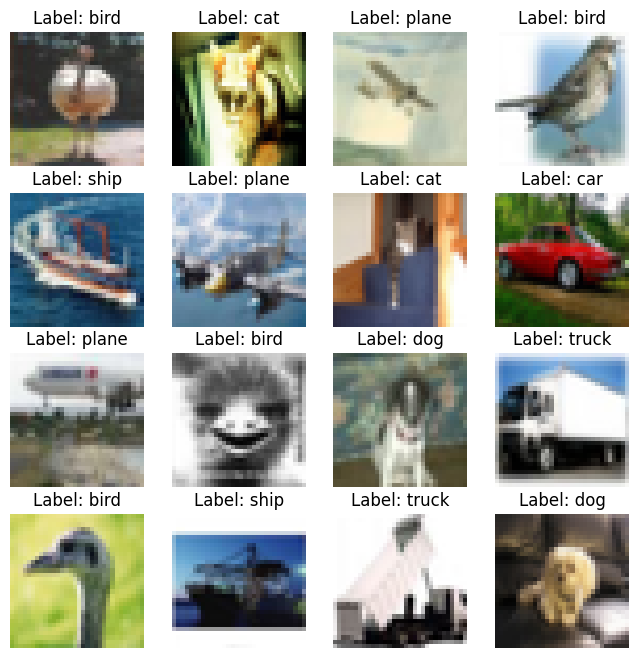

In [15]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

indices = random.sample(range(len(x_train)), 16)

# Create a 4x4 grid for displaying images
fig, ax = plt.subplots(4, 4, figsize=(8, 8))

# Iterate over the random indices and display images
for i, idx in enumerate(indices):
    image = x_train[idx]
    label = y_train[idx].item()
    row = i // 4
    col = i % 4

    ax[row][col].imshow(image)
    ax[row][col].axis('off')
    ax[row][col].set_title(f"Label: {classes[label]}")

plt.show()

### Modelling

Define a class which will form the architecture of your CNN model


In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.relu2 = nn.ReLU()
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(self.relu1(self.conv1(x)))
        x = self.pool(self.relu2(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x

### Training


Define the Convolutional Neural Network Classifier, Criterion function, Optimizer, and Train the Model

In [17]:
# define criterion function, optimizer, learning rate, number of epochs
# define 2 lists where you will store the cost and accuracy for each epoch

num_epochs = 20
losses = []
accuracies = []

def train_model(num_epochs,model, criterion, optimizer, trainloader):
    for epoch in range(num_epochs):
      running_loss = 0.0
      total_correct = 0
      total_samples = 0

      for i, data in enumerate(trainloader, 0):
          inputs, labels = data[0].to(device), data[1].to(device)

          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()
          _, predicted = torch.max(outputs.data, 1)
          total_samples += labels.size(0)
          total_correct += (predicted == labels).sum().item()

      epoch_loss = running_loss / len(trainloader)
      epoch_accuracy = total_correct / total_samples

      losses.append(epoch_loss)
      accuracies.append(epoch_accuracy)

      print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")



## Actually training your model
- Create a model, initialize it. Define optimizer for the model as well as loss criterion (you can actually set the seed here again, just in case you did some ```rand``` calls above for testing your functions).
- Define an instance of the dataset class, wrap it in a dataloader.
- Call the train function and train your model!


In [18]:
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

train_model(num_epochs, model,criterion, optimizer,train_loader)

Epoch [1/20], Loss: 2.0559, Accuracy: 0.2768
Epoch [2/20], Loss: 1.6936, Accuracy: 0.4048
Epoch [3/20], Loss: 1.4763, Accuracy: 0.4734
Epoch [4/20], Loss: 1.3517, Accuracy: 0.5176
Epoch [5/20], Loss: 1.2713, Accuracy: 0.5488
Epoch [6/20], Loss: 1.2005, Accuracy: 0.5762
Epoch [7/20], Loss: 1.1453, Accuracy: 0.5963
Epoch [8/20], Loss: 1.0960, Accuracy: 0.6144
Epoch [9/20], Loss: 1.0461, Accuracy: 0.6338
Epoch [10/20], Loss: 0.9986, Accuracy: 0.6511
Epoch [11/20], Loss: 0.9546, Accuracy: 0.6665
Epoch [12/20], Loss: 0.9123, Accuracy: 0.6813
Epoch [13/20], Loss: 0.8711, Accuracy: 0.6968
Epoch [14/20], Loss: 0.8334, Accuracy: 0.7100
Epoch [15/20], Loss: 0.7878, Accuracy: 0.7282
Epoch [16/20], Loss: 0.7500, Accuracy: 0.7408
Epoch [17/20], Loss: 0.7088, Accuracy: 0.7562
Epoch [18/20], Loss: 0.6710, Accuracy: 0.7701
Epoch [19/20], Loss: 0.6312, Accuracy: 0.7825
Epoch [20/20], Loss: 0.5974, Accuracy: 0.7958


### Analyze Results

Plot the Loss and Accuracy vs Epoch graph

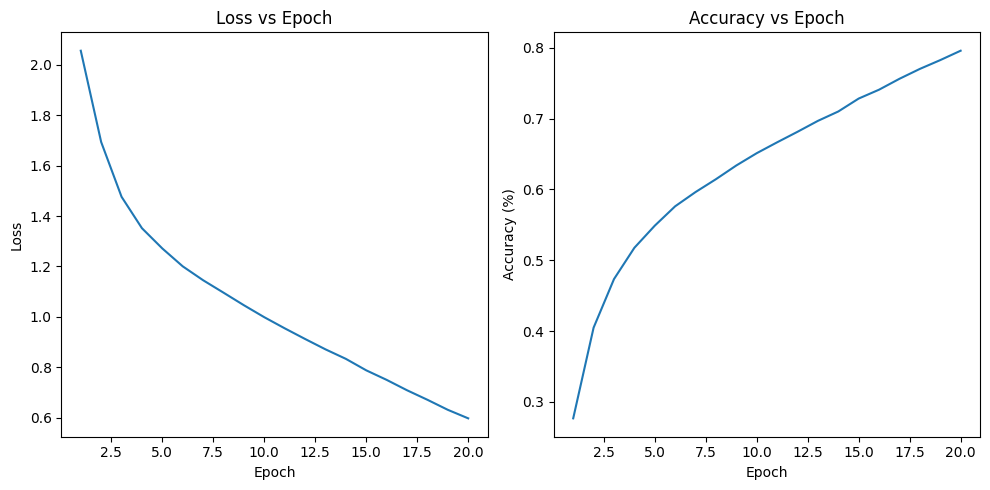

In [19]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Epoch')

plt.tight_layout()
plt.show()

### Submission

Create another folder named **Week 2** in your Github Repo.<br>
Save the trained model in a file named ```final_model.pt```. When you are done with the assignment, commit the updated notebook, and the ```final_model.pt``` model-weights file to Github Repo.

In [20]:
torch.save(model.state_dict(), 'final_model.pt')
model.cuda()

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

### Load the model

Predicted class: cat, Actual class: cat


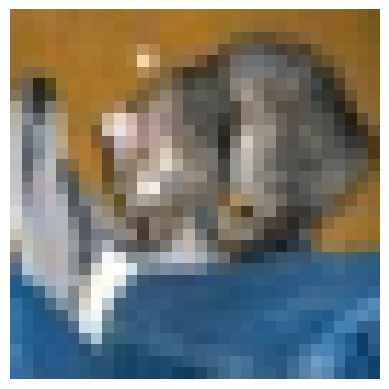

Predicted class: ship, Actual class: ship


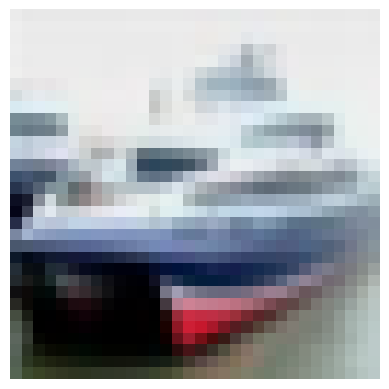

Predicted class: plane, Actual class: ship


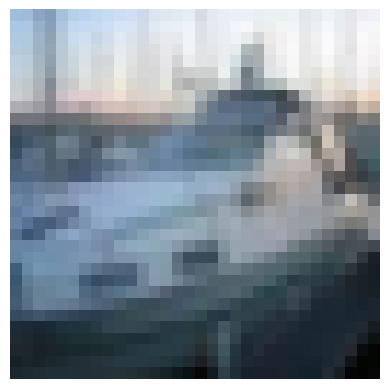

In [21]:
## Load the saved model and Make prediction on few images and display them the same way as before

check_model = CNN()  #creating an instance of model
check_model = check_model.to("cuda")  #converting model's weight tensor into GPU
check_model.load_state_dict(torch.load("final_model.pt"))

count = 0

with torch.no_grad():
    for images, labels in testloader:
        images = images.cuda()
        outputs = check_model(images)
        _, predicted = torch.max(outputs, 1)

        # Display the predicted classes and images
        for i in range(len(images)):
            predicted_class = classes[predicted[i]]
            actual_class = classes[labels[i]]
            print(f"Predicted class: {predicted_class}, Actual class: {actual_class}")

            image = images[i].cpu() / 2 + 0.5  # Unnormalize the image
            image = image.numpy().transpose((1, 2, 0))

            plt.imshow(image)
            plt.axis('off')
            plt.show()
            count += 1
            if count==3 :
              break

        if count==3 :
          break

In [22]:
total = 0
correct = 0

with torch.no_grad():
    for images, labels in testloader:
        images = images.cuda()  # Move the input images to GPU
        labels = labels.cuda()  # Move the labels to GPU
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate and print the accuracy
accuracy = 100 * correct / total
print(f"Accuracy on the test dataset: {accuracy:.2f}%")


Accuracy on the test dataset: 69.83%


# Conclusion

Plotted the graph between loss and accuracy vs epoch. Saved the model withe the name final_model.pt and tried the model with some test datas. Accuracy on test dataset is found to be 56.13% which is good given the dataset.